<h1>Feature Extraction<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Simple-Example-of-PCA" data-toc-modified-id="A-Simple-Example-of-PCA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Simple Example of PCA</a></span><ul class="toc-item"><li><span><a href="#Data-Generation" data-toc-modified-id="Data-Generation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Generation</a></span></li><li><span><a href="#Sample-Statistics" data-toc-modified-id="Sample-Statistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sample Statistics</a></span></li><li><span><a href="#Singular-Value-Decomposition-(SVD)" data-toc-modified-id="Singular-Value-Decomposition-(SVD)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Singular Value Decomposition (SVD)</a></span></li><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span></li><li><span><a href="#Visualize-PCA-result" data-toc-modified-id="Visualize-PCA-result-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualize PCA result</a></span></li></ul></li><li><span><a href="#PCA---California-Housing" data-toc-modified-id="PCA---California-Housing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA - California Housing</a></span><ul class="toc-item"><li><span><a href="#Data-Understanding-and-Preparation" data-toc-modified-id="Data-Understanding-and-Preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Understanding and Preparation</a></span></li><li><span><a href="#Data-Normalization" data-toc-modified-id="Data-Normalization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Normalization</a></span></li><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#Intepret-Principal-Components" data-toc-modified-id="Intepret-Principal-Components-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Intepret Principal Components</a></span></li><li><span><a href="#Explained-Variances-by-Principal-Components" data-toc-modified-id="Explained-Variances-by-Principal-Components-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Explained Variances by Principal Components</a></span></li></ul></li><li><span><a href="#Linear-Disriminant-Analysis-(LDA)" data-toc-modified-id="Linear-Disriminant-Analysis-(LDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear Disriminant Analysis (LDA)</a></span><ul class="toc-item"><li><span><a href="#A-simple-example" data-toc-modified-id="A-simple-example-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>A simple example</a></span></li></ul></li><li><span><a href="#Brief-Overview-of-Feature-Extraction/Reduction-Methods" data-toc-modified-id="Brief-Overview-of-Feature-Extraction/Reduction-Methods-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Brief Overview of Feature Extraction/Reduction Methods</a></span><ul class="toc-item"><li><span><a href="#Optical-recognition-of-handwritten-digits-dataset" data-toc-modified-id="Optical-recognition-of-handwritten-digits-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Optical recognition of handwritten digits dataset</a></span></li><li><span><a href="#Matrix-Decomposition-Methods" data-toc-modified-id="Matrix-Decomposition-Methods-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Matrix Decomposition Methods</a></span></li><li><span><a href="#Manifold-learning" data-toc-modified-id="Manifold-learning-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Manifold learning</a></span></li><li><span><a href="#Discriminant-Analysis" data-toc-modified-id="Discriminant-Analysis-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Discriminant Analysis</a></span></li><li><span><a href="#Random-Projection" data-toc-modified-id="Random-Projection-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Random Projection</a></span></li><li><span><a href="#Neighbors:-Nearest-Neighbors" data-toc-modified-id="Neighbors:-Nearest-Neighbors-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Neighbors: Nearest Neighbors</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li></ul></div>

In [1]:
# mount your google drive with Colab

#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
# change the working directory to your folder in Google Drive. I have a folder "Colab Notebooks" in my Stony Brook Google Drive
#%cd /content/drive/MyDrive/Colab Notebooks

In [3]:
# import libraries and modules to be used
import numpy as np 
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(9, 6))

#import seaborn as sns; sns.set()
import seaborn as sns

import scipy as sp
from scipy import stats # we'll use the stats module of scipy

# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# A Simple Example of PCA

## Data Generation

The scale matrix is:
 [[1.  0. ]
 [0.  0.3]]

The rotation matrix is:
 [[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]

The transform matrix is:
 [[ 0.7071 -0.2121]
 [ 0.7071  0.2121]]


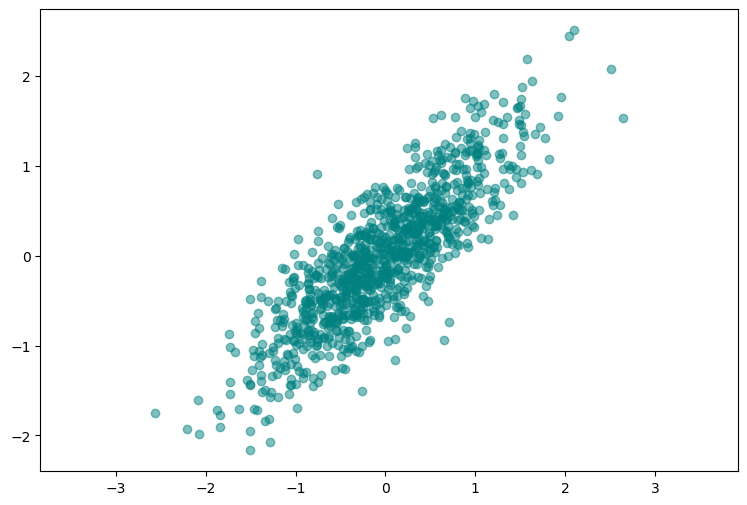

In [4]:
# generate a two-dimensional dataset that are correlated. You can image the dataset is a sample of two attributes with 1000 observations
# You can ignore the method for generating the data, but just assume X is the data provided to you

X = np.random.randn(1000,2) # generate a two-dimensional dataset with 1000 observations randomly generated from the standard normal distribution
scale=np.array([[1,0], [0,0.3]])  # scale matrix: Standard deviations of the two features would become 1 and 0.3
print(f'The scale matrix is:\n {scale}\n')
#rotate=np.array([[np.sqrt(3),-1], [1,np.sqrt(3)]]) / 2 # counterclockwise rotation for 30 deg
rotate=np.array([[1,-1], [1,1]]) / np.sqrt(2) # counterclockwise rotation for 45 deg [[cos(theta), -sin(theta)],[sin(theta), cos(theta)]]
print(f'The rotation matrix is:\n {rotate}\n')
transform = rotate @ scale # transform matrix that scales and rotates the origional dataset
print(f'The transform matrix is:\n {transform}')
X=(transform @ X.T).T # apply the transformation to the origional dataset
plt.scatter(X[:,0],
            X[:,1],
            color='teal',
            alpha=0.5)
plt.axis('equal')
plt.show();

## Sample Statistics

In [5]:
# sample mean of the two features
X.mean(axis=0) 

array([-0.0341, -0.014 ])

In [6]:
# sample variance
X.var(axis=0)

array([0.5576, 0.5541])

In [7]:
# sample co-variance
np.cov(X.T)

array([[0.5582, 0.4685],
       [0.4685, 0.5547]])

## Singular Value Decomposition (SVD)

In [8]:
# Let's perform the singular value decompositioin (SVD) for the zero-centered sample X
U,S,V=np.linalg.svd((X-X.mean(axis=0))) # we can also use np.linalg
print(F'The matrix of right singular vectors is:\n {V.T}') # you may find the matrix of right singular vectors is the rotation matrix (v0,v1)
print(np.square(S)/(len(X)-1)) # You may find the singular value^2 / (sample size-1) = sample variance on the corresponding direction of the singular vector

The matrix of right singular vectors is:
 [[ 0.7084 -0.7058]
 [ 0.7058  0.7084]]
[1.0249 0.0879]


In [9]:
# You can perform eigen value decomposition (EVD) on the covariance matrix of X.T to get the same result
L,F=np.linalg.eig(np.cov(X.T)) # if using the np.cov function to find the covariance matrix
print(F) # eign vectors
print(L) # eignvalues

[[ 0.7084 -0.7058]
 [ 0.7058  0.7084]]
[1.0249 0.0879]


## Principal Component Analysis (PCA)

In [10]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # choose two principal components (d=2), d is no greater than min(rows of X, columns of X)
pca.fit(X-X.mean(axis=0)) # zero-centering X
print(pca.components_) # do you notice that the PC loadings (p1,p2) are the eigen vectors of X's covariance matrix?
print(pca.explained_variance_) # do you notice that the explained variance by PCs are the eigen values?

PCA(n_components=2)

[[ 0.7084  0.7058]
 [-0.7058  0.7084]]
[1.0249 0.0879]


## Visualize PCA result
You can skip this step

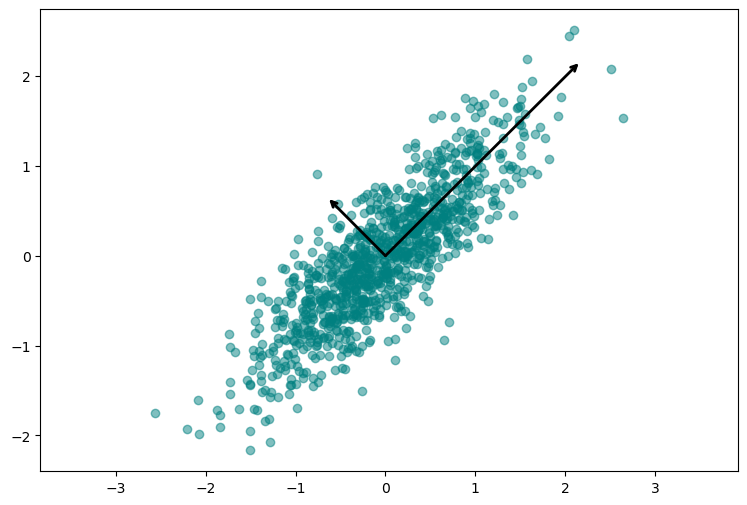

In [11]:
# Define arrows that show vectors (you can skip this step)

def draw_vector(v0, v1, ax=None): # [v0,v1] defines the starting and ending points of the a vector
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


plt.scatter(X[:, 0], 
            X[:, 1], 
            color='teal',
            alpha=0.5) # plot data X
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show();

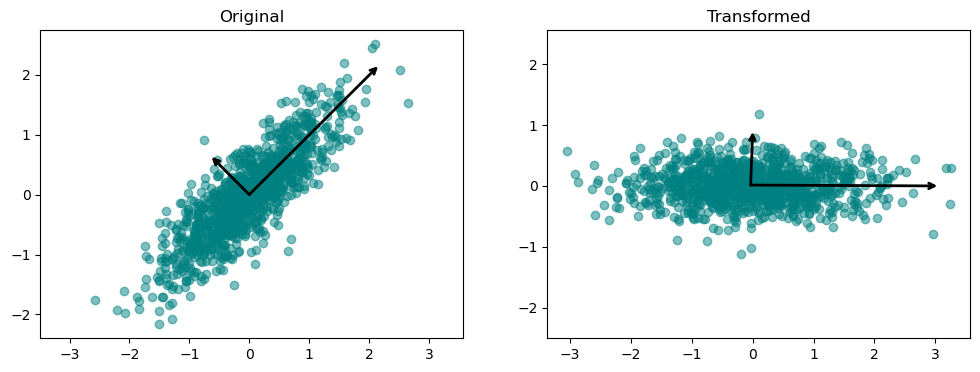

In [12]:
# Let's compare the origional data and transformed data (you can skip this step)

fig, axes = plt.subplots(1,2, figsize=(12,4))

# scatter plot of origional data
axes[0].axis('equal')
axes[0].scatter(X[:,0], 
                X[:,1],
                color='teal',
                alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    draw_vector(pca.mean_, vector*3*np.sqrt(length), axes[0])
axes[0].set_title("Original")

# scatter plot of transformed data
Z=pca.transform(X) # apply pca transform
axes[1].axis('equal')
axes[1].scatter(Z[:,0], 
                Z[:,1],
                color='teal',
                alpha=0.5)
for length, vector in zip(np.var(Z,axis=0), [np.array([1.0,0.0]),np.array([0.0,1.0])]):
    draw_vector(np.mean(Z,axis=0), vector*3*np.sqrt(length), axes[1])
axes[1].set_title("Transformed")

plt.show();

[[0.7084 0.7058]]
The variance explained by the first principal component is 92.10 %.


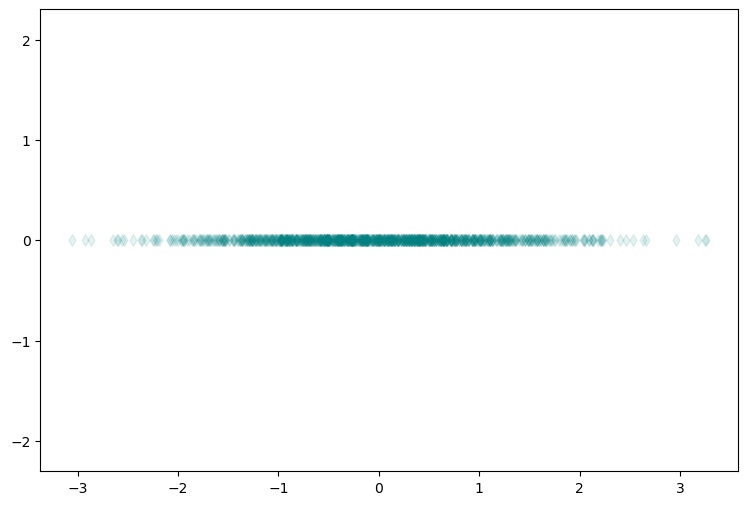

In [13]:
# Let's use one principal component
pca = PCA(n_components=1)
pca.fit(X-X.mean(axis=0))
X_pca = pca.transform(X) # transformed data
print(pca.components_) # the 1st principal component
#print('variance explained by the first principal component is %.3f'%(pca.explained_variance_ratio_[0]*100),'%')
print(f'The variance explained by the first principal component is {pca.explained_variance_ratio_[0]*100:.2f} %.')
plt.axis('equal')
plt.scatter(X_pca[:,0],
            np.zeros(1000), 
            marker="d", 
            color='teal',
            alpha=0.1)
plt.show();

# PCA - California Housing

## Data Understanding and Preparation

In [14]:
# import Carlifornia Housing Dataset
from sklearn.datasets import fetch_california_housing
CA_housing = fetch_california_housing()

In [15]:
# The datset is in a form of a dictionary. Let's check what key values are there in the dataset. 'data' is the data of the 8 independent variables (i.e., features), 'target' is the response variable MEDV
CA_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [16]:
print(CA_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [17]:
# Let's create a dataframe that saves the 8 attributes
df = pd.DataFrame(CA_housing['data'],columns=CA_housing['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Data Normalization

In [18]:
# Scale the data so that each feature has the unit variance
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(df) # compute the mean and standard deviation for the purpose of centering and scaling
#sd_df = scaler.transform(df) # standarize df by performing centering and scaling. We perform PCA on sd_df

sd_df=StandardScaler().fit_transform(df) #fit_transform(df) is equivalent to the three lines above. It fits to data to find mean and standard deviation, and then transform the data by centering and scaling

## Principal Component Analysis (PCA)

In [19]:
from sklearn.decomposition import PCA
No_PC = 8 # define the number of principal components. Here we use No_PC = the total number of attributes in order to observe the contribution of every principal component. Feel free to choose smaller numbers
pca = PCA() # define PCA analysis # n_components using PCA(the number of pinrcipal components)

pca.fit(sd_df) # fit the model on the normalized dataset (i.e., this determines the loadings)
df_pca = pca.transform(sd_df) # apply dimensional reduction to the normalized data to obtain principal components

# fit_transform is the combination of .fit() and .transform(). Don't use fit_transform() on any test dataset
#df_pca=pca.fit_transform(sd_df) # fit the model on the normalized dataset and then transform the data to find principal components.

PCA()

## Visualization



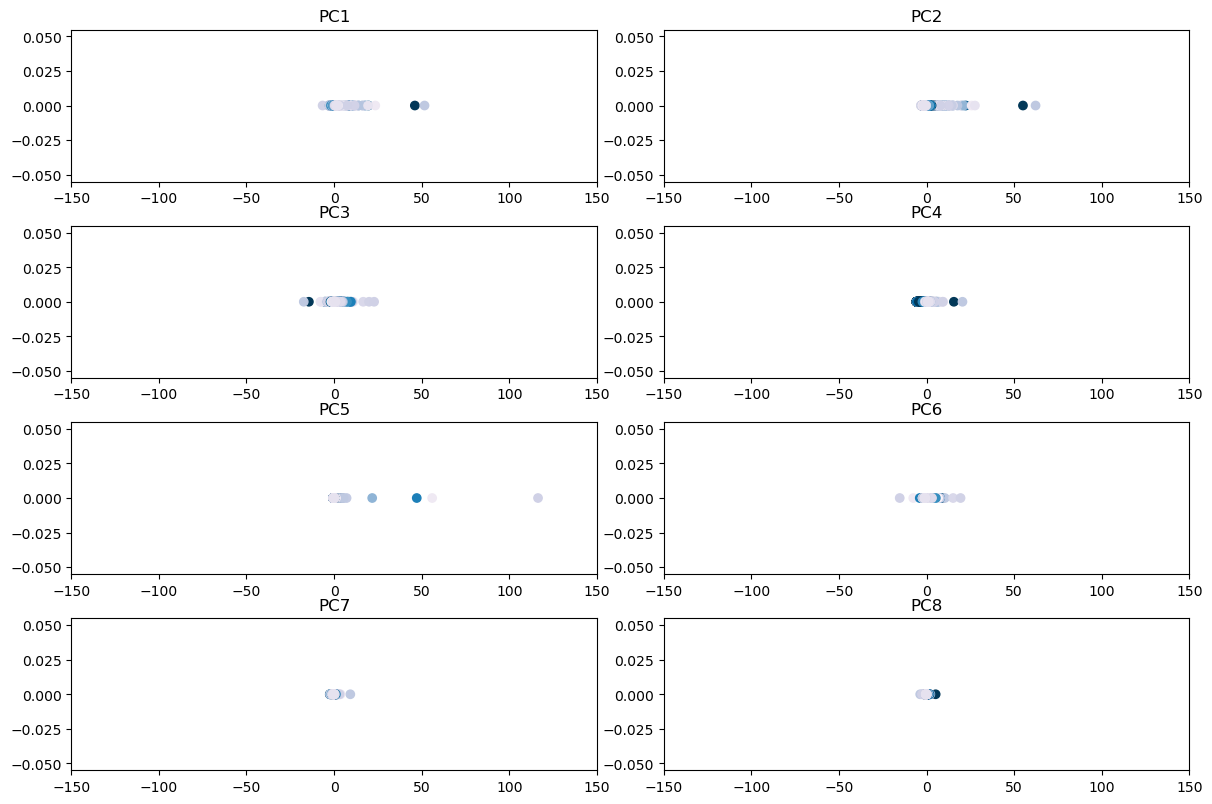

In [20]:
# Let's show the 1D scatter plot of each principal component and the target is indicated by the color
fig, axs=plt.subplots(4,2, figsize=(12,8))
fig.tight_layout()
m=0
for i in range(4):
  for j in range(2):
    axs[i,j].scatter(df_pca[:,m],np.zeros(len(df_pca)),c=CA_housing['target'],cmap='PuBu')
    axs[i,j].set_title('PC%d'%(m+1))
    axs[i,j].set_xlim(-150,150)

    m+=1

plt.show();

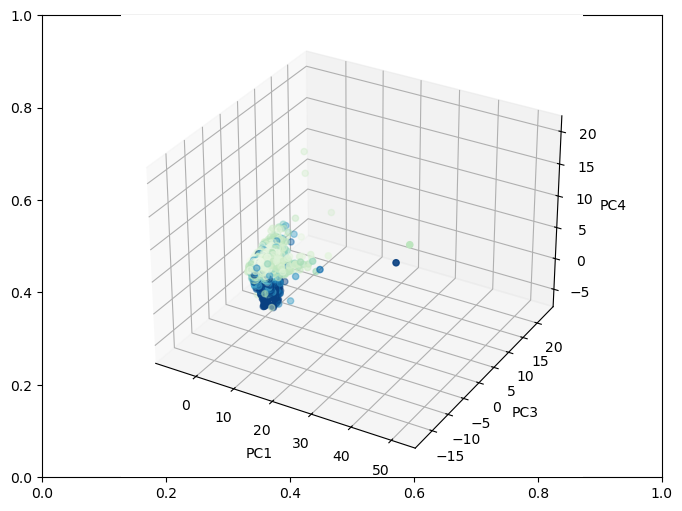

In [21]:
# plot the observations on PC#1, PC#2, and PC#3.
#The color of the observations is median house value
#Can you differentiate median house values by looking at the first three components or any three components?
fig, ax = plt.subplots(1,1,figsize=(8,6))
# select three components by specifying their indices
i = 0
j = 2
k = 3
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca[:,i],df_pca[:,j],df_pca[:,k],c=CA_housing['target'],cmap='GnBu')
ax.set_xlabel('PC%d'%(i+1))
ax.set_ylabel('PC%d'%(j+1))
ax.set_zlabel('PC%d'%(k+1))

plt.show();

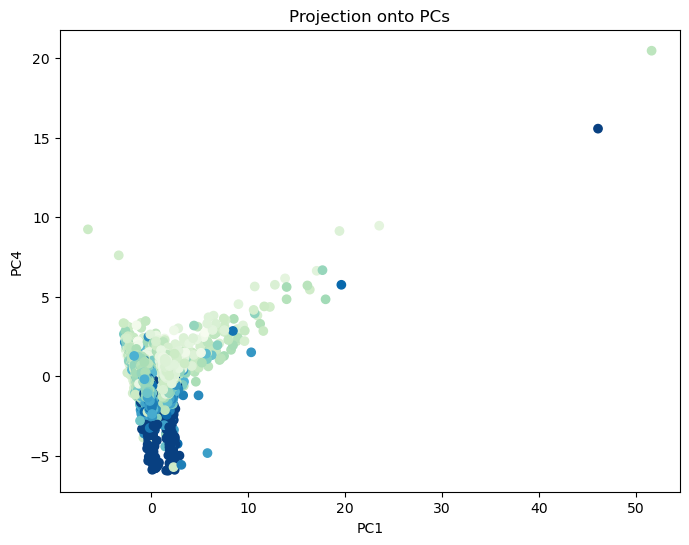

In [22]:
# visualize the projection of data onto any two PCs
fig, ax = plt.subplots(1,1,figsize=(8,6))
i = 0
j = 3
ax.scatter(df_pca[:,i],df_pca[:,j],c=CA_housing['target'],cmap='GnBu')
plt.title('Projection onto PCs')
plt.xlabel('PC%d'%(i+1))
plt.ylabel('PC%d'%(j+1))
plt.colorbar
plt.show();

## Intepret Principal Components

In [23]:
# the Principal components' loadings are stored as an attribute of the fitted PCA object (the ith row is the loadings for obtaining the ith principal component)
pca.components_.round(3)

array([[ 0.077,  0.007,  0.439,  0.4  , -0.172, -0.015,  0.568, -0.537],
       [ 0.23 , -0.261,  0.547,  0.502,  0.101,  0.003, -0.374,  0.422],
       [ 0.218, -0.628, -0.064, -0.192,  0.65 ,  0.158,  0.193, -0.181],
       [-0.885, -0.11 , -0.046,  0.338,  0.283,  0.005,  0.062,  0.06 ],
       [-0.003,  0.223,  0.03 ,  0.051,  0.008,  0.973, -0.023,  0.012],
       [ 0.15 ,  0.684,  0.095,  0.087,  0.675, -0.169, -0.042, -0.083],
       [ 0.169, -0.081, -0.531,  0.532, -0.032,  0.003, -0.432, -0.462],
       [-0.242, -0.045,  0.459, -0.38 , -0.013,  0.009, -0.554, -0.526]])

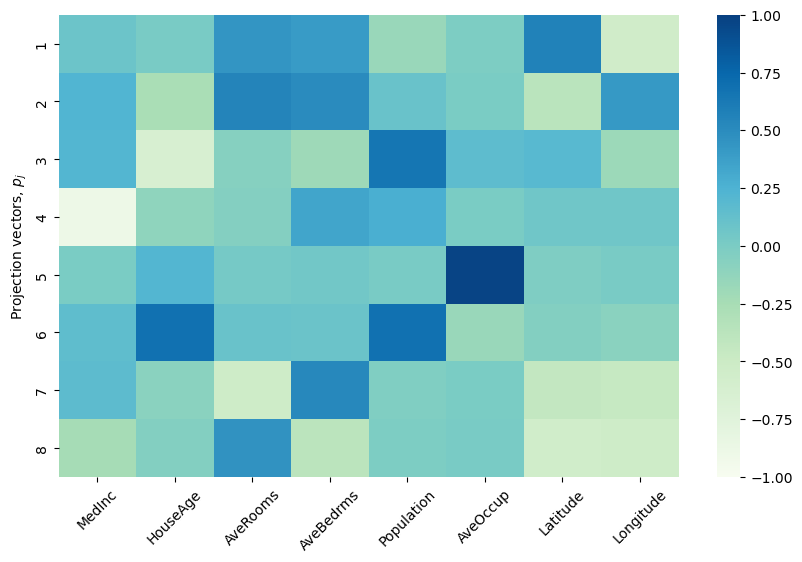

In [24]:
# we visualize the components
#The heatmap and the color bar tell the correlation between the various attributes and the principal component itself.
rel= pd.DataFrame(pca.components_.round(2),
                  columns=CA_housing['feature_names'])
fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(rel,
            annot=False,
            vmin=-1, 
            vmax=1, 
            center= 0,
            annot_kws={"size":8},
            cmap='GnBu',ax=ax)

ax.set_yticklabels(np.arange(1,No_PC+1))
plt.xticks(rotation=45)
plt.ylabel('Projection vectors, $p_j$')
plt.show();

## Explained Variances by Principal Components

In [25]:
# the proportion of variances explained by PCs
pca.explained_variance_ratio_.round(3)

array([0.253, 0.235, 0.159, 0.129, 0.125, 0.082, 0.01 , 0.006])

In [26]:
# the proportion of cumulative variances explained by the first d principal componnets, for d=1, 2, ..., 13
X_var_ratio_cum=pca.explained_variance_ratio_.cumsum() # no.cumsum() returns the cumulative sum of the elements along a given axis
X_var_ratio_cum.round(3)

array([0.253, 0.489, 0.647, 0.776, 0.902, 0.984, 0.994, 1.   ])

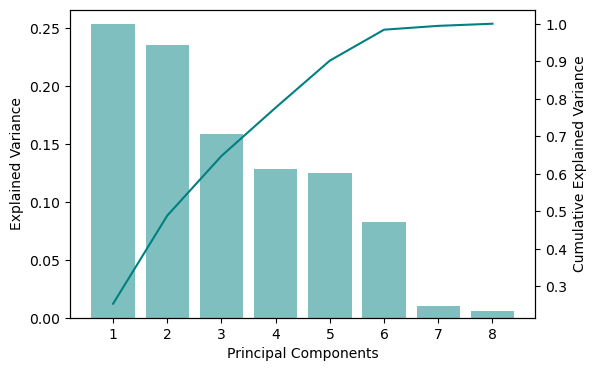

In [27]:
# Visualize the variance explained by different principal components
fig, ax = plt.subplots(1,1, figsize=(6,4))
# we use a bar chart to show the variance explained by each principal component
ax.bar(np.arange(1,No_PC+1,1), 
       pca.explained_variance_ratio_,
       color='teal',
       alpha=0.5)
ax.set_xticks(range(1,No_PC+1))
ax.set_xlabel('Principal Components')
ax.set_ylabel('Explained Variance')
# we use the line chart to show the cumulative variance explained by the top n principal components
ax2 = ax.twinx() # .twinx() creates the secondary axes by sharing the x axis
ax2.plot(range(1,No_PC+1),X_var_ratio_cum, color='teal')
ax2.set_ylabel('Cumulative Explained Variance')
plt.show();

The correlation matrix is:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longit

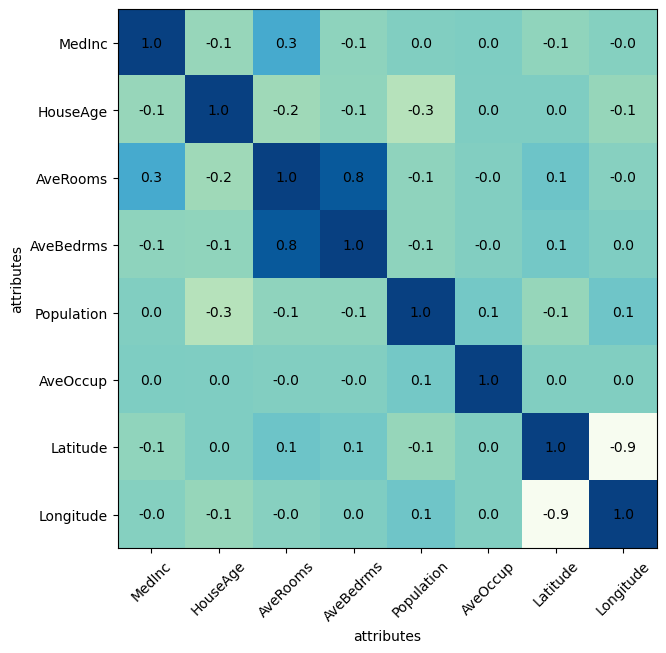

In [28]:
# correlation of attributes

df=pd.DataFrame(np.corrcoef(sd_df.T), columns=CA_housing['feature_names'],index=CA_housing['feature_names'])
print(f'The correlation matrix is:\n {df}')

fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.imshow(df,cmap='GnBu')
ax.set_xlabel('attributes')
ax.set_ylabel('attributes')
ax.set_xticks(range(len(CA_housing['feature_names'])),labels=CA_housing['feature_names'],rotation=45)
ax.set_yticks(range(len(CA_housing['feature_names'])),labels=CA_housing['feature_names'],rotation=0)

for i in range(len(CA_housing['feature_names'])):
    for j in range(len(CA_housing['feature_names'])):
        text = ax.text(i, j, df.iloc[i, j].round(1),
                       ha="center", va="center", color="k")

# sns.heatmap is another way to create the heatmap
#sns.heatmap(np.corrcoef(sd_df.T),annot = True,vmin=-1, vmax=1, center= 0,cmap='seismic',ax=ax)
#plt.xlabel('attributes')
#plt.ylabel('attributes')

plt.show();


The correlation matrix of principal components are:
                   MedInc      HouseAge      AveRooms     AveBedrms  \
MedInc      1.000000e+00 -5.785870e-16  5.164488e-16  4.826980e-16   
HouseAge   -5.785870e-16  1.000000e+00  4.665549e-16  1.275452e-16   
AveRooms    5.164488e-16  4.665549e-16  1.000000e+00 -1.538608e-15   
AveBedrms   4.826980e-16  1.275452e-16 -1.538608e-15  1.000000e+00   
Population -1.868691e-16 -1.103287e-16 -5.371995e-16  1.043056e-16   
AveOccup    8.039979e-17 -1.011958e-15 -2.367712e-15  5.800371e-16   
Latitude    8.161620e-15  2.735148e-15  3.419186e-16  1.003476e-15   
Longitude  -1.110440e-15 -1.010559e-14  3.698002e-15  4.539498e-16   

              Population      AveOccup      Latitude     Longitude  
MedInc     -1.868691e-16  8.039979e-17  8.161620e-15 -1.110440e-15  
HouseAge   -1.103287e-16 -1.011958e-15  2.735148e-15 -1.010559e-14  
AveRooms   -5.371995e-16 -2.367712e-15  3.419186e-16  3.698002e-15  
AveBedrms   1.043056e-16  5.800371e-16  

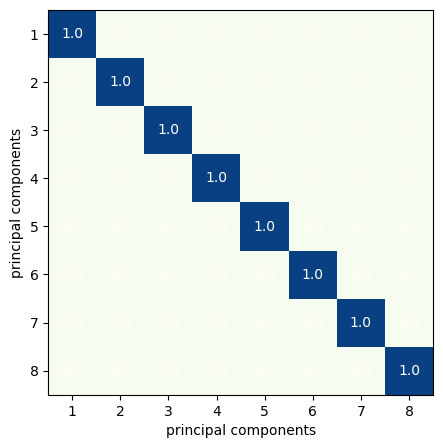

In [29]:
# correlation of principal components

df=pd.DataFrame(np.corrcoef(pca.transform(sd_df).T), columns=CA_housing['feature_names'],index=CA_housing['feature_names'])
print(f'The correlation matrix of principal components are:\n {df}')

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(df,cmap='GnBu')
plt.xlabel('principal components')
plt.ylabel('principal components')
ax.set_xticks(range(len(CA_housing['feature_names'])),labels=range(1,len(CA_housing['feature_names'])+1),rotation=0)
ax.set_yticks(range(len(CA_housing['feature_names'])),labels=range(1,len(CA_housing['feature_names'])+1),rotation=0)

for i in range(len(CA_housing['feature_names'])):
    for j in range(len(CA_housing['feature_names'])):
        text = ax.text(j, i, df.iloc[i, j].round(0),
                       ha="center", va="center", color="w")

#sns.heatmap(np.corrcoef(pca.transform(sd_df).T),annot = True, cmap='seismic')
#plt.xlabel('principal components')
#plt.ylabel('principal components')

plt.show();

# Linear Disriminant Analysis (LDA)

## A simple example

In [30]:
# Data X and its level in a dataframe
LDA_toy_data=pd.DataFrame(np.array([[1.,2.,1], [2.,3.,1], [3.,4.9,1], [2.,1.,2], [3.,2.,2], [4.,3.9,2]]),columns=['x1','x2','y'])
LDA_toy_data

,x1,x2,y
0,1.0,2.0,1.0
1,2.0,3.0,1.0
2,3.0,4.9,1.0
3,2.0,1.0,2.0
4,3.0,2.0,2.0
5,4.0,3.9,2.0


In [31]:
# split X by classes
X_1 = LDA_toy_data.loc[LDA_toy_data.y==1,['x1', 'x2']].values
X_2 = LDA_toy_data.loc[LDA_toy_data.y==2,['x1', 'x2']].values

m_1= X_1.shape[0]
m_2= X_2.shape[0]
print(f'There are {m_1} data points in class 1:\n {X_1}')
print(f'There are {m_2} data points in class 2:\n {X_2}')

There are 3 data points in class 1:
 [[1.  2. ]
 [2.  3. ]
 [3.  4.9]]
There are 3 data points in class 2:
 [[2.  1. ]
 [3.  2. ]
 [4.  3.9]]


In [32]:
# calculate mean attribute values for each class
c_1=X_1.mean(axis=0)
c_2=X_2.mean(axis=0)
print(f'Mean attributes of class 1 is:\n {c_1}')
print(f'Mean attributes of class 2 is:\n {c_2}')

Mean attributes of class 1 is:
 [2.  3.3]
Mean attributes of class 2 is:
 [3.  2.3]


In [33]:
# calculate the within-class scatter matrix
S_w = (X_1-c_1).T@(X_1-c_1) + (X_2-c_2).T@(X_2-c_2)
print(f'The within-class scatter matrix $S_w$ is:\n {S_w}')

The within-class scatter matrix $S_w$ is:
 [[4.   5.8 ]
 [5.8  8.68]]


In [34]:
# calculate the mean attributes for the entire dataset
c = LDA_toy_data.loc[:,['x1','x2']].values.mean(axis=0)
print(f'Mean attributes of the datset is:\n {c}')

Mean attributes of the datset is:
 [2.5 2.8]


In [35]:
# calculate the between-class scatter matrix
S_b_1=(c_1-c).reshape(-1,1)
S_b_2=(c_2-c).reshape(-1,1)

S_b = S_b_1@S_b_1.T*m_1+S_b_2@S_b_2.T*m_2
S_b

# result shows that S_b is a singular matrix that doesn't have an inverse

array([[ 1.5, -1.5],
       [-1.5,  1.5]])

In [36]:
# inverse (S_w)*(c_1-c_2) and then normalize the result to find the unit vector
v = np.linalg.inv(S_w)@(c_1-c_2)
v_norm = np.linalg.norm(v,ord=2)
v = v/v_norm

print(f'the vector is: \n {v}')

the vector is: 
 [-0.8282  0.5605]


In [37]:
# projection of data along the direction defined by v
X_tilde_1=X_1@(v.reshape(-1,1))
X_tilde_2=X_2@(v.reshape(-1,1))
print(X_tilde_1)
print(X_tilde_2)

[[0.2928]
 [0.0252]
 [0.2619]]
[[-1.0958]
 [-1.3635]
 [-1.1267]]


In [38]:
import math
angle=math.degrees(math.atan2(v[1],v[0]))
angle=math.radians(angle)
print(f'the direction of v is {angle:.2f} in redians')

# find the coordinates of the projection in the origional space
X_tilde_1_cor = X_tilde_1*[math.cos(angle),math.sin(angle)]
X_tilde_2_cor = X_tilde_2*[math.cos(angle),math.sin(angle)]

the direction of v is 2.55 in redians


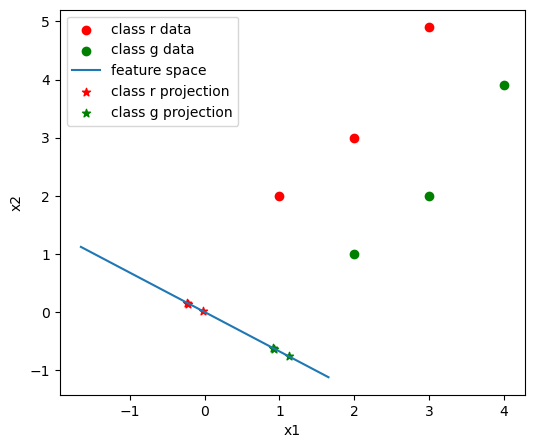

In [39]:
plt.figure(figsize=(6,5))
plt.scatter(X_1[:,0],X_1[:,1],c='r') # plot class 1 data points as read dots
plt.scatter(X_2[:,0],X_2[:,1],c='g') # plot class 2 data points as green dots
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot((0-2*v[0],2*v[0]),(0-2*v[1],2*v[1])) # plot a line representing the direction of v
plt.scatter(X_tilde_1_cor[:,0],X_tilde_1_cor[:,1],c='r',marker='*') # plot the projection of class 1 data points on v as red stars
plt.scatter(X_tilde_2_cor[:,0],X_tilde_2_cor[:,1],c='g',marker='*') # plot the projection of class 2 data points on v as red stars
plt.legend(['class r data', 'class g data', 'feature space','class r projection','class g projection'])
plt.show();

# Brief Overview of Feature Extraction/Reduction Methods

In [74]:
# Import required libraries

from sklearn import datasets
from sklearn.pipeline import make_pipeline # sequentially apply a list of transforms and a final estimator
from sklearn.preprocessing import StandardScaler # normalize data
from sklearn.model_selection import train_test_split # split data into training and testing dadta

## Optical recognition of handwritten digits dataset
Attributes (data): 64 pixel values of 8x8 image. Values are  integer in the range 0...16

Class (target): the class of the image in the range of 0...9

In [75]:
# Load Digits dataset and take a look at the data description
digits = datasets.load_digits() #load data
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [76]:

X_hd, y_hd = digits.data, digits.target #digits.data are features, digits.target is class (0,1,...,9)

# Parameters
dim = len(X_hd[0]) # number of observations
print(f'The number of attributes is: {dim} \n')
n_classes = len(np.unique(y_hd)) # number of classes
print(f'The number of classes is: {n_classes} \n')
obs = len(y_hd)
print(f'The number of observation is: {obs} \n')

random_state = 4 # to make the result replicable

# Split data (both features X and target y) into training and testing datasets. We use training data to learn parameters of feature extraction. We use test data to assess the performance of feature extraction
X_train, X_test, y_train, y_test = train_test_split(
                                                    X_hd, 
                                                    y_hd, 
                                                    test_size=0.2, 
                                                    stratify=y_hd,
                                                    random_state=random_state)

The number of attributes is: 64 

The number of classes is: 10 

The number of observation is: 1797 



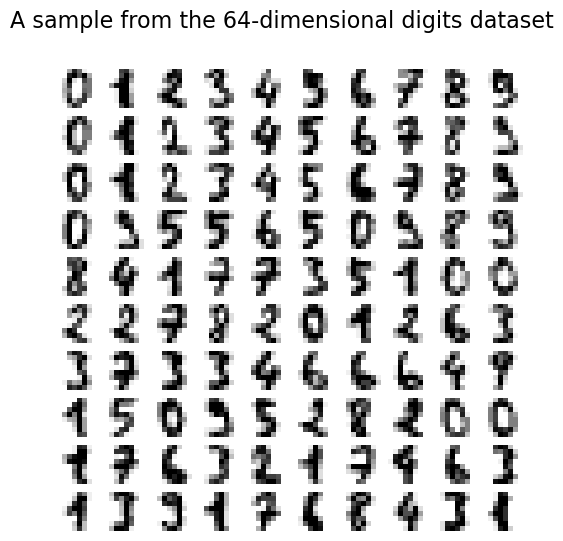

In [77]:
# visualize the first 100 data points of X
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()): # idx is the index of data entries in X
    ax.imshow(X_hd[idx].reshape((8, 8)), cmap=plt.cm.binary) # reshape each entry, a vector of 64x1, into a 8x8 matrix. show the matrix as a grey-colored image
    ax.axis("off") # do not show axis of each image
_ = fig.suptitle("A sample from the 64-dimensional digits dataset", fontsize=16)
plt.show();

## Matrix Decomposition Methods
The sklearn.decomposition module includes matrix decomposition algorithms, including among others PCA, NMF or ICA. Most of the algorithms of this module can be regarded as dimensionality reduction techniques.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

In [78]:
from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, SparsePCA, TruncatedSVD,
                                   FastICA, MiniBatchDictionaryLearning)


In [79]:
# Principal Component Analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the
# data to project it to a lower dimensional space. The input data is centered
# but not scaled for each feature before applying the SVD.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2,
                        random_state=random_state))

In [80]:
# Incremental principal component analysis (IPCA) is typically used as a
# replacement for PCA when the dataset to be decomposed is too large to fit in
# memory. IPCA builds a low-rank approximation for the input data using an
# amount of memory which is independent of the number of input data samples.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.IncrementalPCA.html#sklearn.decomposition.IncrementalPCA
inc_pca = make_pipeline(StandardScaler(),
                        IncrementalPCA(n_components=2))

In [81]:
# KernelPCA is an extension of PCA which achieves non-linear dimensionality
# reduction through the use of kernels.
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, default=’linear’
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
kpca = make_pipeline(StandardScaler(),
                     KernelPCA(kernel="cosine",
                               n_components=2,
                               gamma=None,
                               fit_inverse_transform=True,
                               random_state=random_state,
                               n_jobs=1))

In [82]:
# SparsePCA is a variant of PCA, with the goal of extracting the set of sparse
# components that best reconstruct the data.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html#sklearn.decomposition.SparsePCA
sparsepca = make_pipeline(StandardScaler(),
                          SparsePCA(n_components=2,
                                    alpha=0.0001,
                                    random_state=random_state,
                                    n_jobs=-1))

In [83]:
# Dimensionality reduction using truncated SVD.
# This transformer performs linear dimensionality reduction by means of
# truncated singular value decomposition (SVD). Contrary to PCA, #
# this estimator does not center the data before computing the singular value
# decomposition. This means it can work with sparse matrices efficiently.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD
SVD = make_pipeline(StandardScaler(),
                    TruncatedSVD(n_components=2,
                                 algorithm='randomized',
                                 random_state=random_state,
                                 n_iter=5))

In [84]:
# FastICA: a fast algorithm for Independent Component Analysis (ICA).
# ICA finds the independent components (also called factors, latent variables
# or sources) by maximizing the statistical independence of the estimated
# components.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html#sklearn.decomposition.FastICA
FastICA = make_pipeline(StandardScaler(),
                        FastICA(n_components=2,
                                algorithm = 'parallel',
                                whiten = True,
                                max_iter = 100,
                                random_state=random_state))

In [85]:
# Minibatch Non-negative Matrix Factorization (Minibatch NMF)  finds two
# non-negative matrices, i.e. matrices with all non-negative elements,
# (W, H) whose product approximates the non-negative matrix X. This
# factorization can be used for various proposes including
# dimensionality reduction, source separation, or topic extraction.
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchNMF.html#sklearn.decomposition.MiniBatchNMF
miniBatchDictLearning = make_pipeline(StandardScaler(),
                                      MiniBatchDictionaryLearning(n_components=2,
                                                                  batch_size = 10, #200
                                                                  alpha = 1,
                                                                  n_iter = 25,
                                                                  random_state=random_state))

## Manifold learning
A class of unsupervised estimators that seeks to describe datasets as low-dimensional manifolds embedded in high-dimensional spaces. Readers can review more methods from the link below.
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.manifold

In [86]:
from sklearn.manifold import (Isomap,
                              LocallyLinearEmbedding)

In [87]:
# Isomap Embedding is non-linear dimensionality reduction through
# Isometric Mapping
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap
isomap = make_pipeline(StandardScaler(),
                       Isomap(n_components=2,
                              n_jobs = 4,
                              n_neighbors = 5))

In [88]:
# Locally linear embedding (LLE) seeks a lower-dimensional projection of the
# data which preserves distances within local neighborhoods. It can be thought
# of as a series of local PCAs which are globally compared to find the best
# non-linear embedding.
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html#sklearn.manifold.locally_linear_embedding
lle = make_pipeline(StandardScaler(),
                    LocallyLinearEmbedding(n_components=2,
                                           n_neighbors = 10,
                                           method = 'modified',
                                           n_jobs = 4,
                                           random_state=random_state))

## Discriminant Analysis
Linear Discriminant Analysis and Quadratic Discriminant Analysis

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis


In [89]:
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)

In [90]:
# Linear Discreminant Analysis (LDA) is a method to find a linear combination
# of features that characterizes or separates two or more classes of objects or
# events. Linear discriminant analysis is a supervised dimensionality reduction
# technique whereas PCA is unsupervised.  LDA finds a feature subspace that
# maximizes the separability between the groups.
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

In [91]:
# Quadratic Discriminant Analysis
# Quadratic Discriminant Analysis (QDA) is used to find a non-linear boundary
# between classes, whereas LDA finds a linear boundary between classes
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
qda = make_pipeline(StandardScaler(),
                    QuadraticDiscriminantAnalysis())


## Random Projection
implements a simple and computationally efficient way to reduce the dimensionality of the data by trading a controlled amount of accuracy (as additional variance) for faster processing times and smaller model sizes. Two types of unstructured random matrix: Gaussian random matrix and sparse random matrix, are introduced below.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.random_projection

In [92]:
from sklearn.random_projection import (GaussianRandomProjection,
                                       SparseRandomProjection)

In [93]:
# Gaussian Random Projection
# The GaussianRandomProjection reduces the dimensionality by projecting the
# original input space on a randomly generated matrix where components are
# drawn from the following distribution N(0, 1 / n_components)
# https://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html#sklearn.random_projection.GaussianRandomProjection
GRP = make_pipeline(StandardScaler(),
                    GaussianRandomProjection(n_components=2,
                                             eps = 0.5,
                                             random_state=random_state))

In [94]:
# Sparse Random Projection
# The SparseRandomProjection reduces the dimensionality by projecting the
# original input space using a sparse random matrix. It is an alternative to
# dense Gaussian random projection matrix that guarantees similar embedding
# quality while being much more memory efficient and allowing faster
# computation of the projected data. See the link below for detail.
# https://scikit-learn.org/stable/modules/random_projection.html#sparse-random-matrix
SRP = make_pipeline(StandardScaler(),
                    SparseRandomProjection(n_components=2,
                                           density = 'auto',
                                           eps = 0.5,
                                           random_state=random_state,
                                           dense_output = False))

## Neighbors: Nearest Neighbors

sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.random_projection

In [95]:
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)

In [96]:
# Neighborhood Components Analysis: a machine learning algorithm for metric
# learning. It learns a linear transformation in a supervised fashion to
# improve the classification accuracy of a stochastic nearest neighbors rule in
# the transformed space.
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NeighborhoodComponentsAnalysis.html#sklearn.neighbors.NeighborhoodComponentsAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))

In [97]:
# K Neighbors Classifier implements learning based on the nearest neighbors of
# each query point, where is an integer value specified by the user
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
n_neighbors=10
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

## Comparison

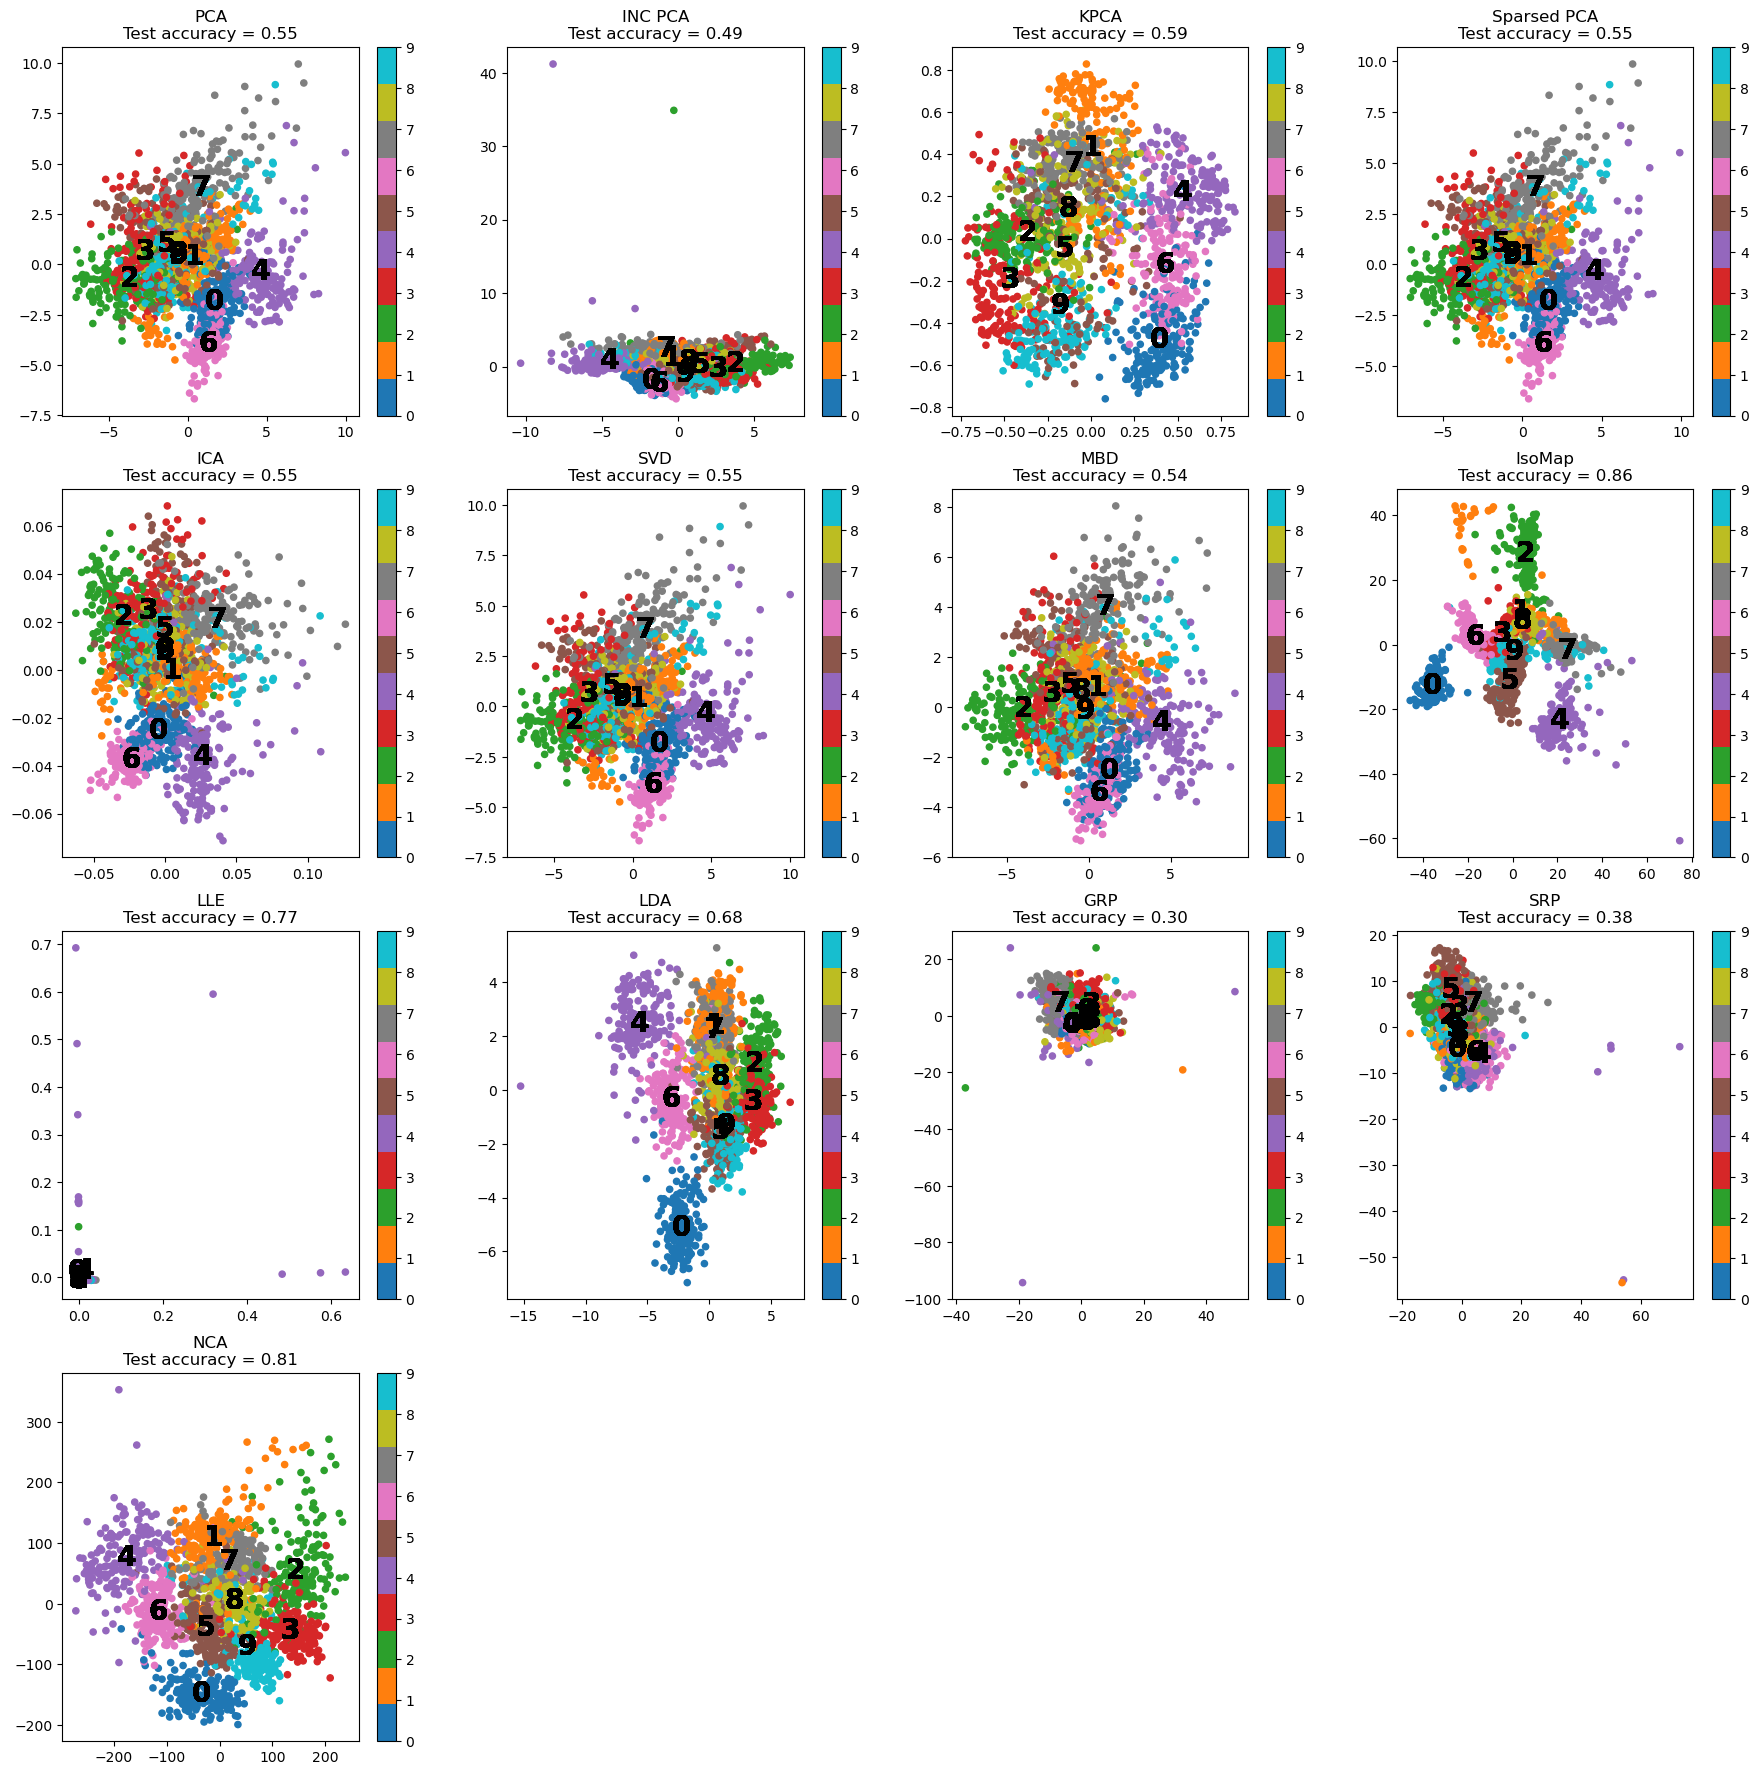

In [109]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Make a list of the methods for comparison
feature_extraction_methods = {'PCA': pca, # Principal Component Analysis
                         'INC PCA': inc_pca, # Incremental PCA
                         'KPCA':kpca, # Kernel PCA
                         'Sparsed PCA': sparsepca, # Sparsed PCA
                         'ICA': FastICA, # Fast Independent Component Analysis
                         'SVD': SVD,  # Truncated SVD
                         'MBD': miniBatchDictLearning, # Minibatch Dictionary Learning
                         'IsoMap': isomap, # Isomap Embedding
                         'LLE': lle, # lower-dimensional projection
                         'LDA': lda, # Linear Discriminant Analysis
                         'GRP' : GRP, # Gausian Random Projection
                         'SRP': SRP, # Sparse Random Projection
                         'NCA': nca # Neighborhood Components Analysis
                         }


plt.figure(figsize=(22, 22))

for j,(name, model) in enumerate(feature_extraction_methods.items()):
    plt.subplot(4, 4, j + 1, aspect='auto')

    # Fit each method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training dataset (i.e., the extracted features). If the method extracts two high quality features, these should be good for classification
    knn.fit(model.transform(X_train), y_train) # fit an knn classifier using features extracted using a feature extraction method listed above

    # Compute the nearest neighbor accuracy on the embedded test dataset (i.e., the extracted fatures) to measure the method's quality for feature extraction.
    acc_knn = knn.score(model.transform(X_test), y_test) # test the ability of extracted features to perform the classification task on the test dataset

    # Extracted feature using the fitted model
    X_embedded = model.transform(X_hd)

    # Creating a dataframe to easily plot the sample label
    df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y_hd, (-1, 1))), axis=1)) #np.reshape(y,(-1,1)) means to reshape y into a column

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_hd, s=20, cmap='tab10')
    plt.title("{}".format(name))
    plt.title("{}\nTest accuracy = {:.2f}".format(name,acc_knn))
    plt.colorbar()

    # Label the data distributions
    for i, number in enumerate(y_test):
        plt.annotate(number,
                     df.loc[df[2]==number,[0,1]].mean(),
                     horizontalalignment='center',
                     verticalalignment='center',
                     weight='bold',
                     size='20')
#plt.savefig('MethodComparison.png')
plt.show();